<a href="https://colab.research.google.com/github/ShinUkhang/AI/blob/main/(%EC%88%98%EC%97%85)%ED%95%9C%EA%B0%95%EC%88%98%EC%9C%84%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#팔당댐의 수위를 이용하여 한강 다리의 수위를 예측하자. 

[팔당댐 수위 관련 영상](https://youtu.be/b3KGjnMF2cs)

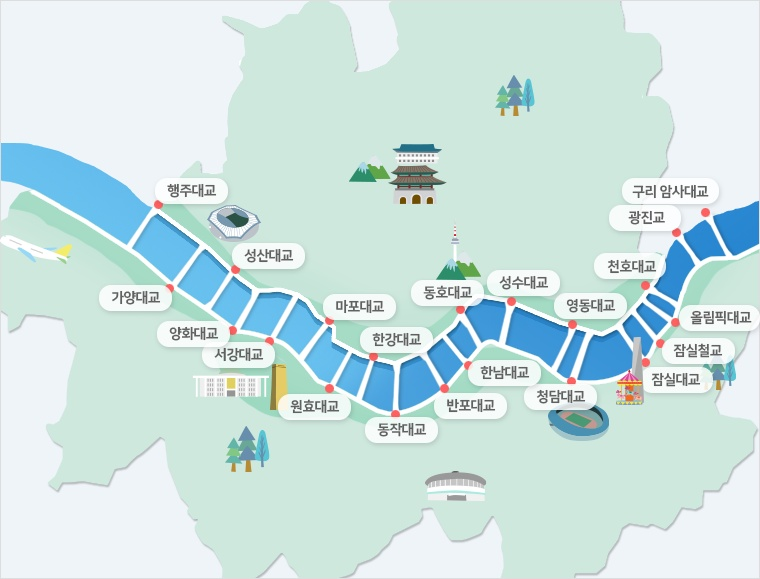

image.png

[대곡교 진관교 영상](https://youtu.be/0g_VniXchxM)

[구글 맵스](https://www.google.com/maps/)
구글 맵스 또는 네이버 지도등을 활용하여 진관교, 대곡교, 송정동의 위치를 찾아보고, 이곳의 수량을 파악하는 이유를 생각해봅시다. 

[구글 드라이브 자료실](https://drive.google.com/drive/folders/14YGcPjxS31aK5Is9Z0XbKg0FH0kEPfnE?usp=sharing)

##데이터의 전처리
엑셀 데이터를 먼저 전터리 하는 과정을 학습합니다. 

자신이 관심 있는 자료를 조사하고 똑같은 방법으로 정리해봅시다. 

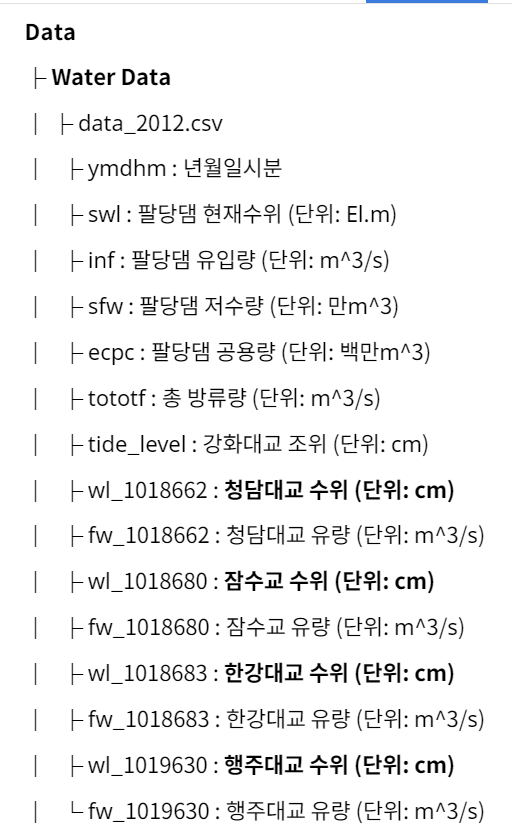

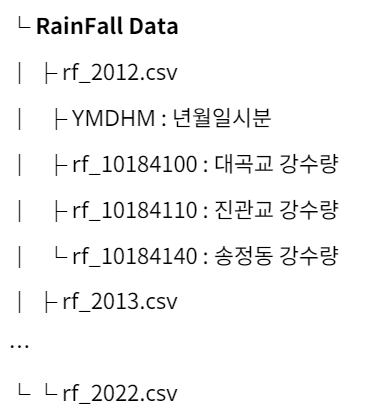

1. 자신이 전처리한 데이터를 불러옵니다. 

  코드를 실행시키는 방법은 왼쪽의 재생버튼을 클릭하거나, control+enter를 누르기 입니다. 





In [ ]:
from google.colab import files #구글 코랩의 files라는 모듈을 불러옵니다. 
uploaded=files.upload() #파일을 선택하도록 창이 열리면, 처리할 파일을 선택합니다. 

Saving waterdata_2021_eng.csv to waterdata_2021_eng.csv


2. 데이터를 읽고, 변수로 이름을 지정해줍니다.
  
  판다스(pandas)는 표 형태의 데이터를 처리하는 패키지(모듈의 모음)입니다. 
  쉽게 말하면 파이썬의 엑셀이라고 보시면 됩니다. 

In [ ]:
import pandas as pd #pandas라는 모듈을 불러옵니다. 
data=pd.read_csv('waterdata_2021_eng.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) #data라는 변수로 파일의 이름을 지정해줍니다. 다른이름도 가능합니다. 

3. 데이터를 분석해보자. 

In [ ]:
data.head() #head라는 함수는 전체데이터의 첫 5줄만 보여줍니다. tail은 마지막 5줄을 보여줍니다.

,month,day,height,input,contain,empty,output,sea,cdb,jsb,hgb,hjb,dgb,jgb,sjd
0,6,23,25.09,719.0,214.69,29.31,516.0,591.0,310.7,302.2,303,286.3,0,0,9
1,7,19,24.87,701.0,206.73,37.27,145.0,454.0,275.7,270.2,272,262.3,0,0,8
2,10,31,25.05,0.0,213.23,30.77,157.0,NaN,267.7,258.2,265,251.3,0,0,8
3,9,21,24.86,408.0,206.37,37.63,507.0,238.0,370.7,363.2,364,346.3,3,5,6
4,10,1,25.00,237.0,211.41,32.59,338.0,272.0,279.7,269.2,275,250.3,2,1,6


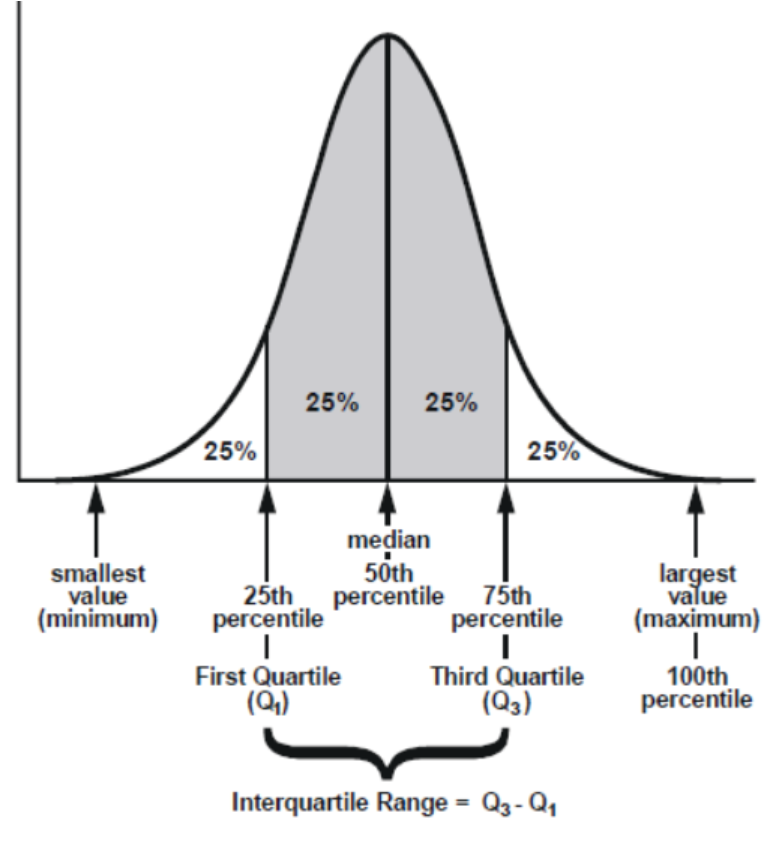

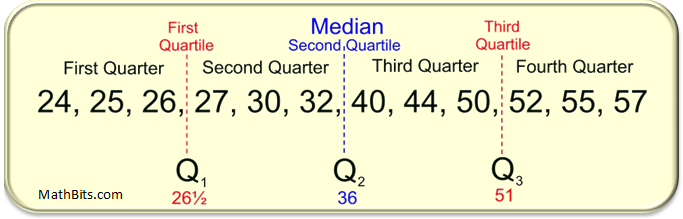

In [ ]:
data.describe() # 평균, 표준편차, 사분위수, 최대값, 최소값을 알려줍니다. 

,month,day,height,input,contain,empty,output,sea,cdb,jsb,hgb,hjb,dgb,jgb,sjd
count,26496.000000,26496.000000,26458.000000,26458.000000,26458.000000,26458.000000,26458.000000,23895.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,7.500000,15.836957,24.940149,374.358757,209.231132,34.768868,368.509751,352.206152,309.185885,301.760726,303.753850,288.966365,0.021173,0.029438,0.024419
std,1.709978,8.854394,0.101850,330.244164,3.741925,3.741925,316.024240,167.158404,32.521809,30.452662,29.627729,26.594316,0.243358,0.279854,0.220928
min,5.000000,1.000000,24.560000,0.000000,194.630000,18.930000,0.000000,62.000000,262.700000,258.200000,257.000000,247.300000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,24.870000,177.000000,206.730000,32.230000,177.000000,205.000000,286.700000,281.200000,283.000000,270.300000,0.000000,0.000000,0.000000
50%,7.500000,16.000000,24.940000,338.000000,209.240000,34.760000,324.000000,337.000000,300.700000,294.200000,296.000000,283.300000,0.000000,0.000000,0.000000
75%,9.000000,23.250000,25.010000,479.000000,211.770000,37.270000,435.000000,487.000000,322.700000,315.200000,317.000000,302.300000,0.000000,0.000000,0.000000
max,10.000000,31.000000,25.370000,24675.000000,225.070000,49.370000,25056.000000,786.000000,476.700000,458.200000,454.000000,406.300000,24.000000,14.000000,9.000000


In [ ]:
data.info() #데이터의 갯수와 형태를 알려줍니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    26496 non-null  int64  
 1   day      26496 non-null  int64  
 2   height   26458 non-null  float64
 3   input    26458 non-null  float64
 4   contain  26458 non-null  float64
 5   empty    26458 non-null  float64
 6   output   26458 non-null  float64
 7   sea      23895 non-null  float64
 8   cdb      26496 non-null  float64
 9   jsb      26496 non-null  float64
 10  hgb      26496 non-null  int64  
 11  hjb      26496 non-null  float64
 12  dgb      26496 non-null  int64  
 13  jgb      26496 non-null  int64  
 14  sjd      26496 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 3.0 MB


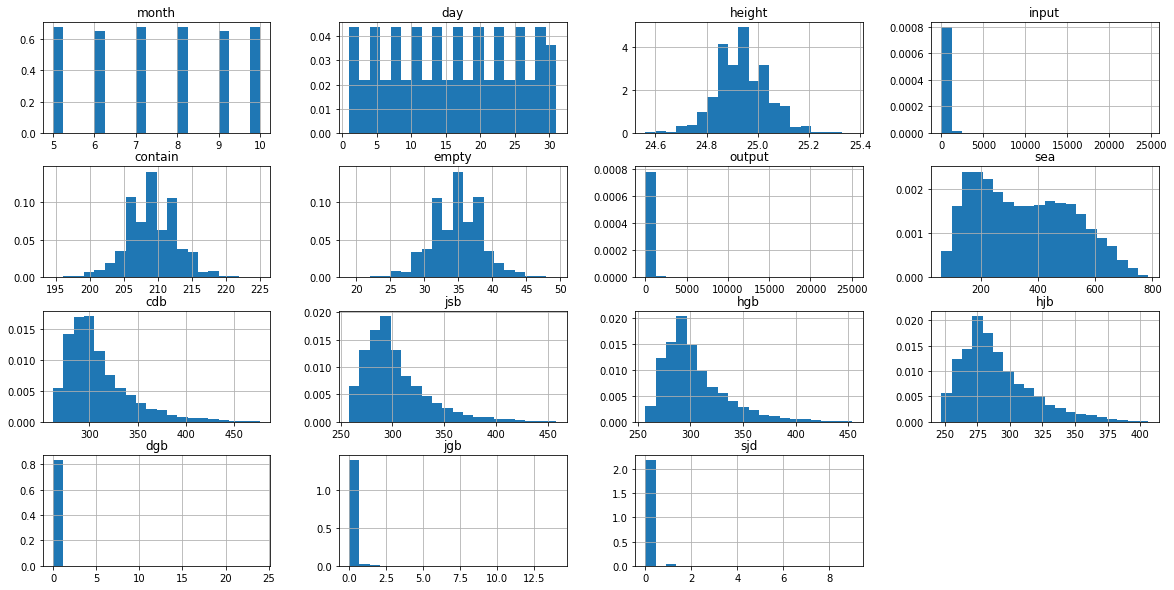

In [ ]:
import matplotlib.pyplot as plt #맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다. 
data.hist(bins=20,density=True, figsize=(20,10)) #hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기 입니다.
plt.show()

아래 그림은 상관계수에 대한 그림입니다. 

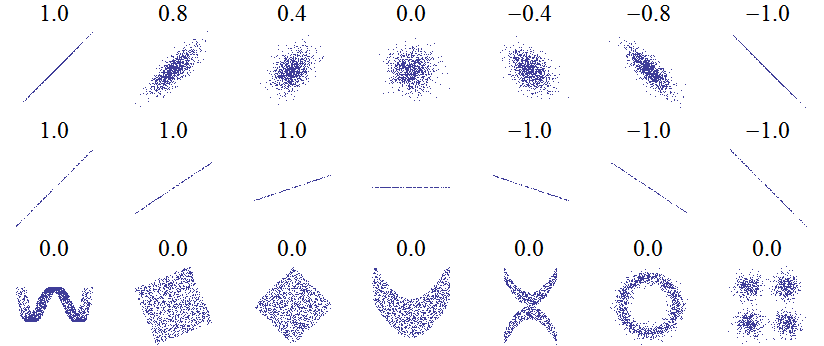

In [ ]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['jsb']

month     -0.113274
day        0.009700
height    -0.045608
input      0.352491
contain   -0.046820
empty      0.046820
output     0.385461
sea       -0.093745
cdb        0.990725
jsb        1.000000
hgb        0.995523
hjb        0.922866
dgb        0.039701
jgb        0.044286
sjd        0.040943
Name: jsb, dtype: float64

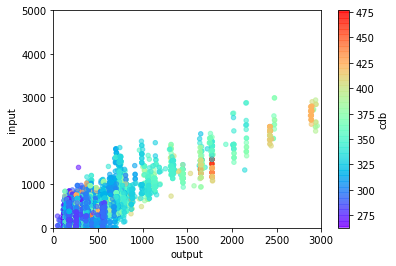

In [ ]:
data.plot(kind='scatter', x='output',y='input',c='cdb' ,cmap='rainbow', alpha=0.6, sharex=False) #scatter는 산점도, c는 색상대상, cmap은 색tkd, alpha는 투명도, sharex는 테두리 없애기
plt.xlim(0,3000)# x축의 범위
plt.ylim(0,5000)# y축의 범위
plt.show()

In [ ]:
data=data.dropna() #데이터에서 결측치가 있는 행을 삭제합니다. 

4. 처리하고자하는 데이터의 열을 선택합니다. 

In [ ]:
data1=data[['month','height','input','output','contain','empty','sea','cdb','jsb','hgb','hjb', 'dgb','jgb','sjd']]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23860 entries, 0 to 23979
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    23860 non-null  int64  
 1   height   23860 non-null  float64
 2   input    23860 non-null  float64
 3   output   23860 non-null  float64
 4   contain  23860 non-null  float64
 5   empty    23860 non-null  float64
 6   sea      23860 non-null  float64
 7   cdb      23860 non-null  float64
 8   jsb      23860 non-null  float64
 9   hgb      23860 non-null  int64  
 10  hjb      23860 non-null  float64
 11  dgb      23860 non-null  int64  
 12  jgb      23860 non-null  int64  
 13  sjd      23860 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.7 MB


In [ ]:
data1.head()

,month,height,input,output,contain,empty,sea,cdb,jsb,hgb,hjb,dgb,jgb,sjd
0,6,25.09,719.0,516.0,214.69,29.31,591.0,310.7,302.2,303,286.3,0,0,9
1,7,24.87,701.0,145.0,206.73,37.27,454.0,275.7,270.2,272,262.3,0,0,8
3,9,24.86,408.0,507.0,206.37,37.63,238.0,370.7,363.2,364,346.3,3,5,6
4,10,25.00,237.0,338.0,211.41,32.59,272.0,279.7,269.2,275,250.3,2,1,6
5,9,24.86,411.0,510.0,206.37,37.63,216.0,373.7,363.2,363,340.3,1,1,6


5. 인공신경망의 시작입니다. 

In [ ]:
x=data1[['input','output', 'dgb','jgb','sjd','cdb']]
y=data1['jsb']

from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

데이터의 형태를 행렬의 개념을 이용하여 설명합니다.

3학년 진로선택 기하과목에서 벡터를 베우는 데, 그 것을 확장한 것입니다. 

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16702, 5)
(16702,)
(7158, 5)
(7158,)


데이터를 표준화 시키는 작업을 합니다. 

확률과통계 시간에 학습한 내용을 생각해보면 평균이 0, 표준편차가 1인 데이터로 바꾸어 주는 것입니다. 

표준화는 왜 필요할까요? 처리하기 전 후의 오차를 비교해보세요. 

In [ ]:
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)

In [ ]:
print(mean)
print(std)

input     393.132679
output    388.546641
dgb         0.024967
jgb         0.032930
sjd         0.026284
cdb       311.731254
dtype: float64
input     351.555948
output    338.937850
dgb         0.281198
jgb         0.307179
sjd         0.223929
cdb        32.621190
dtype: float64


In [ ]:
x_train-=mean
x_train/=std
x_test-=mean
x_test/=std

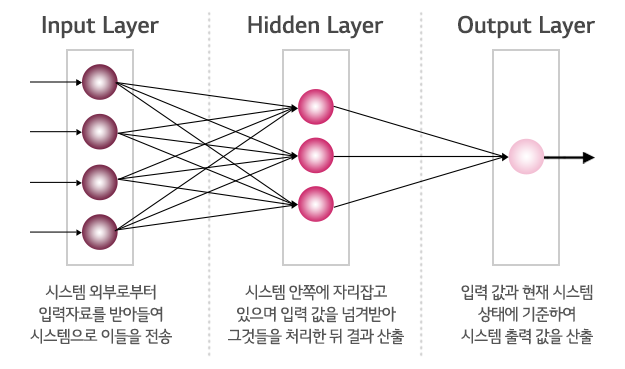

In [ ]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(10, input_dim=6,activation='relu')) # 노드 6개짜리 덴스 추가
model.add(Dense(3, activation='relu')) # 노드 5개짜리 덴스 추가
model.add(Dense(1)) #출력층
opt=keras.optimizers.SGD(learning_rate=0.00001) #확률적 경사하강법, 학습률 확인
model.compile(optimizer=opt, loss='mse', metrics=['mae']) # 손실함수 mse, 옵티마이져는 SGD

In [ ]:
import time
a=time.time()
hist = model.fit(x_train, y_train, shuffle=True, epochs=5, batch_size=10) #epoch는 반복횟수, batch_size=10는 데이터 10개 중에 1개 처리
b=time.time()
print(b-a)

Epoch 1/5
1671/1671 [==============================] - 4s 3ms/step - loss: 666.3252 - mae: 6.2545
Epoch 2/5
1671/1671 [==============================] - 6s 3ms/step - loss: 535.3076 - mae: 6.1235
Epoch 3/5
1671/1671 [==============================] - 4s 3ms/step - loss: 645.4539 - mae: 6.3001
Epoch 4/5
1671/1671 [==============================] - 4s 3ms/step - loss: 549.3515 - mae: 5.9947
Epoch 5/5
1671/1671 [==============================] - 4s 3ms/step - loss: 422.8314 - mae: 5.8046
41.00250291824341


In [ ]:
pd.DataFrame(hist.history) # 손실함수의 결과를 표로 표현해보자. 

,loss,mae
0,666.325195,6.254547
1,535.307556,6.123497
2,645.453857,6.300134
3,549.351501,5.994708
4,422.831360,5.804556


In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'],  label='train_loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test) #테스트데이터로 평가해보자. 

224/224 [==============================] - 0s 1ms/step


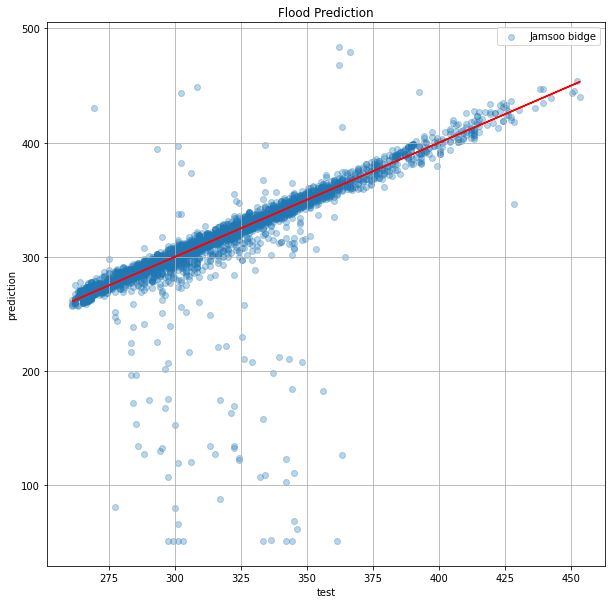

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.3, label='Jamsoo bidge') #alpha는 투명도
plt.plot(y_test,y_test, c='r')
plt.xlabel('test')
plt.ylabel('prediction')
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(y_pred,bins=100,alpha=0.4, label='pred', density=True)
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(y_pred,bins=100,alpha=0.4, label='pred', density=True)
plt.hist(y_test, bins=100, alpha=0.4, label='test', density=True)
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()